# Applying T-type Confidence interveal finder Method

* we assume that the initial distribution is Norma Distribution
* CI = Samples_mean +/- T(alpha/2)* (standart_deviation/sqaureroot(n))
* where alpha = confidence score, T() - form T table (like Z-table)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# using Titanic Dataset

In [2]:
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df = pd.concat([train_df.drop(columns = ['Survived']),test_df]).sample(1309)

<Axes: ylabel='Density'>

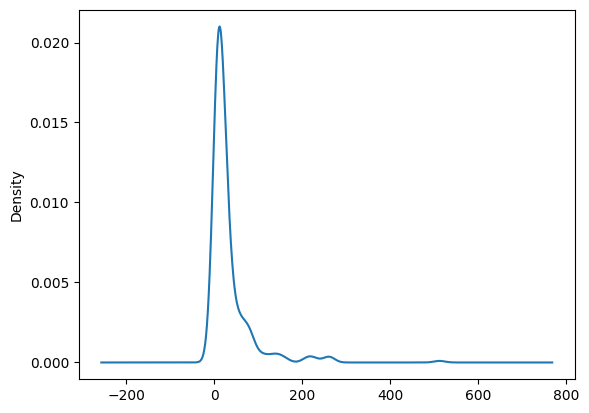

In [5]:
df['Fare'].plot(kind='kde')

taking 10 samples each length of 30, so n = 30 (for T-table)

In [6]:
samples = []
stds = []
for i in range(10):
    x = df['Fare'].dropna().sample(30).values
    stds.append(x.std())
    samples.append(x.tolist())

In [7]:
samples = np.array(samples)

In [8]:
sampling_means = samples.mean(axis = 1)

In [9]:
sample_std = np.mean(stds)

In [10]:
import seaborn as sns

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

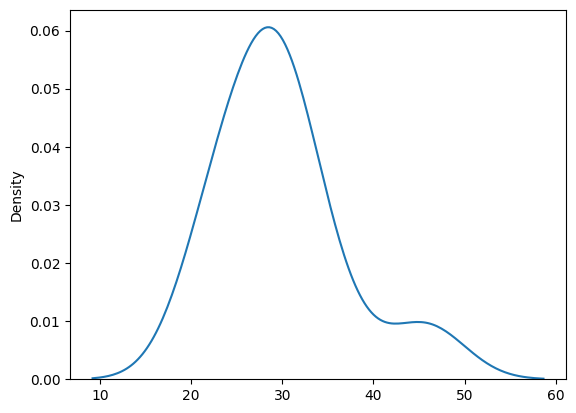

In [11]:
sns.kdeplot(sampling_means)

# **for 95% confidence interval**  (refer T-table to know the values)

In [12]:
upper_limit = sampling_means.mean() + 2.042*(sample_std/np.sqrt(30))
lower_limit = sampling_means.mean() - 2.042*(sample_std/np.sqrt(30))

In [13]:
print("the range is", lower_limit," to ",upper_limit)

the range is 16.21887788849415  to  43.398288778172514


In [14]:
sampling_means.mean()

29.80858333333333

In [15]:
df['Fare'].mean()

33.29547928134557

As you can see we calculated the upper limit and lower limit with 95% confidence score and predicted mean is 33.88 wheras real mean = 33.295, here we also know th real value but if we dont know the real value then we can conclude that we are 95% sure that **the Point Estimate** (here mean) lies between the above range.